# EDA Thesis Aryana - Province NH 

# Imports

In [72]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
 # Read recipe inputs
wijkcode_zonnedakje_cbswijk_joined_filtered = dataiku.Dataset("wijkcode_zonnedakje_cbswijk_joined_filtered")
wijkcode_zonnedakje_cbswijk_joined_filtered_df = wijkcode_zonnedakje_cbswijk_joined_filtered.get_dataframe()

In [74]:
df = wijkcode_zonnedakje_cbswijk_joined_filtered_df # For this sample code, simply copy input to output

In [75]:
df.head()

PC6 Gemeentenaam2021           BAG ID  Huisnummer Huisletter Toevoeging Postcode  Bouwjaar          Buurt              Wijk                                       Gebruiksdoel  Oppervlakte [m2] Geschiktheid  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         SDE_status Beschermd stadgezicht Zonnepanelen in 2020 Zonnepanelen in 2021 Beschermd monument                 RES  buurt_code   gm_naam   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh bev_dich  a_woning g_ele g_gas_hu g_gas_ko p_stadsv a_opl_lg a_opl_md a_opl_hg p_arb_pp p_arb_wn p_arb_zs g_ink_pi p_ink_hi  a_bedv a_bed_a a_bed_bf a_bed_gi a_bed_hj a_bed_kl a_bed_mn a_bed_oq a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse
0  1112CL           Diemen  384100000003420       300.0        NaN       K216   1112CL      2002    Beukenhorst       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303    Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690        .        .        .        .        .        .        .        .      6,4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
1  1112CL           Diemen  384100000003420       300.0        NaN       K216   1112CL      2002    Beukenhorst       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303    Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690        .        .        .        .        .        .        .        .      6,4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
2  1431GD         Aalsmeer  358100022233829        47.0          B        NaN   1431GD      1972       Hornmeer  Wijk 00 Aalsmeer                   industriefunctie, kantoorfunctie           2901.40     Geschikt                  2783.50                   1012.0                       278505.49  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03580004  Aalsmeer  2550.0  1240.0   1305.0    345.0     215.0  1130.0      984    1125.0  3030     1380     1710        .        .        .        .        .        .        .     29,9     17,5   495.0       5       60      175       45       35       85       50       45   1431.0       1.0      4.0    717.0                  G
3  1382DE            Weesp  457100000057397         1.0        NaN        NaN   1382DE      2005  Dichtersbuurt             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU04570201     Weesp  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020        .        .        .        .        .        .        .        .     20,1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A
4  1382DE            Weesp  457100000057397         1.0        NaN        NaN   1382DE      2005  Dichtersbuurt             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0

# Handling missing values 

In [76]:
#Convert comma to point
df['p_ink_hi']=df['p_ink_hi'].str.replace(',','.')
df['g_ink_pi']=df['g_ink_pi'].str.replace(',','.')

In [77]:
df.shape

(39474, 58)

In [78]:
#Drop more than 10% anomalies
df.drop(['p_stadsv'],axis=1,inplace=True)
df.drop(['a_opl_lg'],axis=1,inplace=True)
df.drop(['a_opl_md'],axis=1,inplace=True)
df.drop(['a_opl_hg'],axis=1,inplace=True)
df.drop(['p_arb_pp'],axis=1,inplace=True)
df.drop(['p_arb_wn'],axis=1,inplace=True)
df.drop(['p_arb_zs'],axis=1,inplace=True)
df.drop(['g_ink_pi'],axis=1,inplace=True)

In [79]:
df.isnull().any()

PC6                                True
Gemeentenaam2021                   True
BAG ID                            False
Huisnummer                         True
Huisletter                         True
Toevoeging                         True
Postcode                          False
Bouwjaar                          False
Buurt                             False
Wijk                              False
Gebruiksdoel                       True
Oppervlakte [m2]                  False
Geschiktheid                      False
Geschikt oppervlak [m2]           False
Potentie aantal panelen           False
Potentie jaarlijks opwek [kWh]    False
SDE_status                        False
Beschermd stadgezicht             False
Zonnepanelen in 2020              False
Zonnepanelen in 2021              False
Beschermd monument                False
RES                               False
buurt_code                        False
gm_naam                            True
a_inw                              True


In [80]:
df['bev_dich'] = df['bev_dich'].replace('.', np.nan)
df['g_ele'] = df['g_ele'].replace('.', np.nan)
df['g_gas_hu'] = df['g_gas_hu'].replace('.', np.nan)
df['g_gas_ko'] = df['g_gas_ko'].replace('.', np.nan)
df['p_ink_hi'] = df['p_ink_hi'].replace('.', np.nan)
df['a_bed_a'] = df['a_bed_a'].replace('.', np.nan)
df['a_bed_bf'] = df['a_bed_bf'].replace('.', np.nan)
df['a_bed_gi'] = df['a_bed_gi'].replace('.', np.nan)
df['a_bed_hj'] = df['a_bed_hj'].replace('.', np.nan)
df['a_bed_kl'] = df['a_bed_kl'].replace('.', np.nan)
df['a_bed_mn'] = df['a_bed_mn'].replace('.', np.nan)
df['a_bed_oq'] = df['a_bed_oq'].replace('.', np.nan)
df['a_bed_ru'] = df['a_bed_ru'].replace('.', np.nan)

In [81]:
# Removing columns with more than 10% missing values, only two columns have this; dropping these columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 50 columns):
PC6                               39113 non-null object
Gemeentenaam2021                  39113 non-null object
BAG ID                            39474 non-null int64
Huisnummer                        39466 non-null float64
Huisletter                        8341 non-null object
Toevoeging                        4626 non-null object
Postcode                          39474 non-null object
Bouwjaar                          39474 non-null int64
Buurt                             39474 non-null object
Wijk                              39474 non-null object
Gebruiksdoel                      39471 non-null object
Oppervlakte [m2]                  39474 non-null float64
Geschiktheid                      39474 non-null object
Geschikt oppervlak [m2]           39474 non-null float64
Potentie aantal panelen           39474 non-null float64
Potentie jaarlijks opwek [kWh]    39474 non-null fl

In [82]:
df.replace('.', np.nan)

PC6 Gemeentenaam2021           BAG ID  Huisnummer Huisletter Toevoeging Postcode  Bouwjaar                            Buurt                              Wijk                                       Gebruiksdoel  Oppervlakte [m2] Geschiktheid  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         SDE_status Beschermd stadgezicht Zonnepanelen in 2020 Zonnepanelen in 2021 Beschermd monument                 RES  buurt_code         gm_naam   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh bev_dich  a_woning g_ele g_gas_hu g_gas_ko p_ink_hi  a_bedv a_bed_a a_bed_bf a_bed_gi a_bed_hj a_bed_kl a_bed_mn a_bed_oq a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse
0      1112CL           Diemen  384100000003420       300.0        NaN       K216   1112CL      2002                      Beukenhorst                       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303          Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
1      1112CL           Diemen  384100000003420       300.0        NaN       K216   1112CL      2002                      Beukenhorst                       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303          Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
2      1431GD         Aalsmeer  358100022233829        47.0          B        NaN   1431GD      1972                         Hornmeer                  Wijk 00 Aalsmeer                   industriefunctie, kantoorfunctie           2901.40     Geschikt                  2783.50                   1012.0                       278505.49  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03580004        Aalsmeer  2550.0  1240.0   1305.0    345.0     215.0  1130.0      984    1125.0  3030     1380     1710     17.5   495.0       5       60      175       45       35       85       50       45   1431.0       1.0      4.0    717.0                  G
3      1382DE            Weesp  457100000057397         1.0        NaN        NaN   1382DE      2005                    Dichtersbuurt                             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU04570201           Weesp  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A
4      1382DE            Weesp  457100000057397         1.0        NaN        NaN   1382DE      2005                    Dichtersbuurt                             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee            

In [83]:
df.isna().sum()

PC6                                 361
Gemeentenaam2021                    361
BAG ID                                0
Huisnummer                            8
Huisletter                        31133
Toevoeging                        34848
Postcode                              0
Bouwjaar                              0
Buurt                                 0
Wijk                                  0
Gebruiksdoel                          3
Oppervlakte [m2]                      0
Geschiktheid                          0
Geschikt oppervlak [m2]               0
Potentie aantal panelen               0
Potentie jaarlijks opwek [kWh]        0
SDE_status                            0
Beschermd stadgezicht                 0
Zonnepanelen in 2020                  0
Zonnepanelen in 2021                  0
Beschermd monument                    0
RES                                   0
buurt_code                            0
gm_naam                             361
a_inw                               361


In [84]:
# df2 = df[[column for column in df if df[column].count() / len(df) >= 0.9]]
# df = df2
# df.shape

In [85]:
#Drop more than 10% missing values
df.drop(['Huisletter'],axis=1,inplace=True)
df.drop(['Toevoeging'],axis=1,inplace=True)


In [86]:
df.isna().sum()

PC6                                361
Gemeentenaam2021                   361
BAG ID                               0
Huisnummer                           8
Postcode                             0
Bouwjaar                             0
Buurt                                0
Wijk                                 0
Gebruiksdoel                         3
Oppervlakte [m2]                     0
Geschiktheid                         0
Geschikt oppervlak [m2]              0
Potentie aantal panelen              0
Potentie jaarlijks opwek [kWh]       0
SDE_status                           0
Beschermd stadgezicht                0
Zonnepanelen in 2020                 0
Zonnepanelen in 2021                 0
Beschermd monument                   0
RES                                  0
buurt_code                           0
gm_naam                            361
a_inw                              361
a_man                              361
a_vrouw                            361
a_w_all                  

In [87]:
df.head()

PC6 Gemeentenaam2021           BAG ID  Huisnummer Postcode  Bouwjaar          Buurt              Wijk                                       Gebruiksdoel  Oppervlakte [m2] Geschiktheid  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         SDE_status Beschermd stadgezicht Zonnepanelen in 2020 Zonnepanelen in 2021 Beschermd monument                 RES  buurt_code   gm_naam   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh bev_dich  a_woning g_ele g_gas_hu g_gas_ko p_ink_hi  a_bedv a_bed_a a_bed_bf a_bed_gi a_bed_hj a_bed_kl a_bed_mn a_bed_oq a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse
0  1112CL           Diemen  384100000003420       300.0   1112CL      2002    Beukenhorst       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303    Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
1  1112CL           Diemen  384100000003420       300.0   1112CL      2002    Beukenhorst       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303    Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
2  1431GD         Aalsmeer  358100022233829        47.0   1431GD      1972       Hornmeer  Wijk 00 Aalsmeer                   industriefunctie, kantoorfunctie           2901.40     Geschikt                  2783.50                   1012.0                       278505.49  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03580004  Aalsmeer  2550.0  1240.0   1305.0    345.0     215.0  1130.0      984    1125.0  3030     1380     1710     17.5   495.0       5       60      175       45       35       85       50       45   1431.0       1.0      4.0    717.0                  G
3  1382DE            Weesp  457100000057397         1.0   1382DE      2005  Dichtersbuurt             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU04570201     Weesp  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A
4  1382DE            Weesp  457100000057397         1.0   1382DE      2005  Dichtersbuurt             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU04570201     Weesp  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A

In [88]:
#Dropping the 361 rows with missing values 
df.dropna()

PC6 Gemeentenaam2021           BAG ID  Huisnummer Postcode  Bouwjaar                            Buurt                              Wijk                                       Gebruiksdoel  Oppervlakte [m2] Geschiktheid  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         SDE_status Beschermd stadgezicht Zonnepanelen in 2020 Zonnepanelen in 2021 Beschermd monument                 RES  buurt_code         gm_naam   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh bev_dich  a_woning g_ele g_gas_hu g_gas_ko p_ink_hi  a_bedv a_bed_a a_bed_bf a_bed_gi a_bed_hj a_bed_kl a_bed_mn a_bed_oq a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse
0      1112CL           Diemen  384100000003420       300.0   1112CL      2002                      Beukenhorst                       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303          Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
1      1112CL           Diemen  384100000003420       300.0   1112CL      2002                      Beukenhorst                       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85     Geschikt                  2573.75                    935.0                       248485.26  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03840303          Diemen   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C
2      1431GD         Aalsmeer  358100022233829        47.0   1431GD      1972                         Hornmeer                  Wijk 00 Aalsmeer                   industriefunctie, kantoorfunctie           2901.40     Geschikt                  2783.50                   1012.0                       278505.49  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU03580004        Aalsmeer  2550.0  1240.0   1305.0    345.0     215.0  1130.0      984    1125.0  3030     1380     1710     17.5   495.0       5       60      175       45       35       85       50       45   1431.0       1.0      4.0    717.0                  G
3      1382DE            Weesp  457100000057397         1.0   1382DE      2005                    Dichtersbuurt                             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU04570201           Weesp  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A
4      1382DE            Weesp  457100000057397         1.0   1382DE      2005                    Dichtersbuurt                             Noord               overige gebruiksfunctie, woonfunctie           1758.94     Geschikt                   941.25                    342.0                        91534.20  Mogelijk geschikt                   Nee                  Nee                  Nee                Nee  Noord-Holland Zuid  BU04570201           Weesp  1835.0   925.0    910.0    350.0     400.0  1105.0    

In [89]:
print(df['Zonnepanelen in 2021'].describe())

count     39474
unique        2
top         Nee
freq      30412
Name: Zonnepanelen in 2021, dtype: object


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 48 columns):
PC6                               39113 non-null object
Gemeentenaam2021                  39113 non-null object
BAG ID                            39474 non-null int64
Huisnummer                        39466 non-null float64
Postcode                          39474 non-null object
Bouwjaar                          39474 non-null int64
Buurt                             39474 non-null object
Wijk                              39474 non-null object
Gebruiksdoel                      39471 non-null object
Oppervlakte [m2]                  39474 non-null float64
Geschiktheid                      39474 non-null object
Geschikt oppervlak [m2]           39474 non-null float64
Potentie aantal panelen           39474 non-null float64
Potentie jaarlijks opwek [kWh]    39474 non-null float64
SDE_status                        39474 non-null object
Beschermd stadgezicht             39474 non-null

In [91]:
df.describe()

BAG ID    Huisnummer      Bouwjaar  Oppervlakte [m2]  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         a_inw         a_man       a_vrouw       a_w_all      a_nw_all          a_hh      a_woning        a_bedv       pst_mvp      pst_dekp       ste_mvs       ste_oad
count  3.947400e+04  39466.000000  39474.000000      39474.000000             39474.000000             39474.000000                    3.947400e+04  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000  39113.000000
mean   3.810427e+14    240.319541   1987.248619       2382.793461              1681.472343               610.974895                    1.614869e+05   2593.446680   1279.309181   1313.516606    468.193951    882.813643   1386.579015   1296.613939    436.123284   1118.136604      1.142050      1.484085   3739.474753
std    1.015505e+14    339.411313     74.176388       2986.432998              2139.909466               778.168804                    2.043059e+05   1646.716989    808.142721    843.626763    285.864416    796.447955    800.166996    814.970861    258.645229    116.163877      0.554753      0.799947   2363.532146
min    3.581000e+14      1.000000   1005.000000        285.100000               153.750000                55.000000                    1.501253e+04      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      5.000000   1011.000000      1.000000      1.000000     28.000000
25%    3.631000e+14     38.000000   1973.000000        736.480000               553.500000               201.000000                    5.341562e+04   1395.000000    705.000000    730.000000    260.000000    330.000000    835.000000    685.000000    255.000000   1035.000000      1.000000      1.000000   2125.000000
50%    3.631000e+14    111.000000   1998.000000       1408.340000              1030.500000               374.000000                    9.842953e+04   2365.000000   1175.000000   1170.000000    410.000000    625.000000   1260.000000   1198.000000    365.000000   1083.000000      1.000000      1.000000   3021.000000
75%    3.631000e+14    290.000000   2018.000000       2666.790000              2002.500000               728.000000                    1.857742e+05   3430.000000   1695.000000   1730.000000    650.000000   1235.000000   1810.000000   1746.000000    580.000000   1115.000000      1.000000      2.000000   4891.000000
max    1.942100e+15   3550.000000   2021.000000      50490.310000             49478.750000             17992.000000                    4.964925e+06   9250.000000   4650.000000   4605.000000   1770.000000   4280.000000   3795.000000   3813.000000   1405.000000   1444.000000      5.000000      5.000000  12465.000000

In [92]:
df.nunique()

PC6                               3967
Gemeentenaam2021                    18
BAG ID                            4846
Huisnummer                         640
Postcode                          3970
Bouwjaar                           165
Buurt                              667
Wijk                               190
Gebruiksdoel                       215
Oppervlakte [m2]                  4749
Geschiktheid                         1
Geschikt oppervlak [m2]           3174
Potentie aantal panelen           1004
Potentie jaarlijks opwek [kWh]    4844
SDE_status                           3
Beschermd stadgezicht                2
Zonnepanelen in 2020                 2
Zonnepanelen in 2021                 2
Beschermd monument                   2
RES                                  1
buurt_code                         676
gm_naam                             18
a_inw                              478
a_man                              357
a_vrouw                            362
a_w_all                  

In [93]:
df['Pand_energieklasse'].unique()

array(['C', 'G', 'A', 'B', 'E', 'A+++', 'A+', 'A++', 'F', 'A+++++', 'D',
       'A++++'], dtype=object)

# Handling categorical values (see Figure/Table 1 EDA report)

In [94]:
#Dropping columns
df.drop(['PC6'],axis=1,inplace=True)
#df.drop(['BAG ID'],axis=1,inplace=True)
df.drop(['Huisnummer'],axis=1,inplace=True)
df.drop(['Postcode'],axis=1,inplace=True)
df.drop(['Buurt'],axis=1,inplace=True)
df.drop(['Geschiktheid'],axis=1,inplace=True)
df.drop(['gm_naam'],axis=1,inplace=True)
df.drop(['buurt_code'],axis=1,inplace=True)
df.drop(['RES'],axis=1,inplace=True)

In [95]:
# # Converting bouwjaar (year the building was built) to age of building  
# df['Age'] = 2023 - df['Bouwjaar']
# df.head()

In [96]:
df.dtypes

Gemeentenaam2021                   object
BAG ID                              int64
Bouwjaar                            int64
Wijk                               object
Gebruiksdoel                       object
Oppervlakte [m2]                  float64
Geschikt oppervlak [m2]           float64
Potentie aantal panelen           float64
Potentie jaarlijks opwek [kWh]    float64
SDE_status                         object
Beschermd stadgezicht              object
Zonnepanelen in 2020               object
Zonnepanelen in 2021               object
Beschermd monument                 object
a_inw                             float64
a_man                             float64
a_vrouw                           float64
a_w_all                           float64
a_nw_all                          float64
a_hh                              float64
bev_dich                           object
a_woning                          float64
g_ele                              object
g_gas_hu                          

# One hot encoding for binary variables

In [97]:
#Beschermd stadgezicht 
beschermd = pd.get_dummies(df['Beschermd stadgezicht'])
df = df.drop('Beschermd stadgezicht',axis = 1)
df = df.join(beschermd)
df['beschermdstadgezicht_ja'] = df['Ja'] #1 if yes 0 if no 
df = df.drop('Ja',axis = 1)
df = df.drop('Nee',axis = 1)


In [98]:
#Zonnepanelen 2020
zonne2020 = pd.get_dummies(df['Zonnepanelen in 2020'])
df = df.drop('Zonnepanelen in 2020',axis = 1)
df = df.join(zonne2020)
df['zonnepanelen2020_ja'] = df['Ja'] #1 if yes 0 if no 
df = df.drop('Ja',axis = 1)
df = df.drop('Nee',axis = 1)



In [99]:
#Zonnepanelen 2021
zonne2021 = pd.get_dummies(df['Zonnepanelen in 2021'])
df = df.drop('Zonnepanelen in 2021',axis = 1)
df = df.join(zonne2021)
df['zonnepanelen2021_ja'] = df['Ja'] #1 if yes 0 if no 
df = df.drop('Ja',axis = 1)
df = df.drop('Nee',axis = 1)


In [100]:
df['Beschermd monument'].describe()

count     39474
unique        2
top         Nee
freq      39462
Name: Beschermd monument, dtype: object

In [101]:
#Only 12/39474 are yes, dropping this column
df.drop(['Beschermd monument'],axis=1,inplace=True)

In [102]:
df.dtypes

Gemeentenaam2021                   object
BAG ID                              int64
Bouwjaar                            int64
Wijk                               object
Gebruiksdoel                       object
Oppervlakte [m2]                  float64
Geschikt oppervlak [m2]           float64
Potentie aantal panelen           float64
Potentie jaarlijks opwek [kWh]    float64
SDE_status                         object
a_inw                             float64
a_man                             float64
a_vrouw                           float64
a_w_all                           float64
a_nw_all                          float64
a_hh                              float64
bev_dich                           object
a_woning                          float64
g_ele                              object
g_gas_hu                           object
g_gas_ko                           object
p_ink_hi                           object
a_bedv                            float64
a_bed_a                           

In [103]:
df['Gebruiksdoel'].unique()

array(['bijeenkomstfunctie, gezondheidszorgfunctie, kantoorfunctie, woonfunctie',
       'industriefunctie, kantoorfunctie',
       'overige gebruiksfunctie, woonfunctie', 'industriefunctie',
       'kantoorfunctie', 'winkelfunctie, woonfunctie',
       'bijeenkomstfunctie, woonfunctie', 'woonfunctie',
       'bijeenkomstfunctie',
       'kantoorfunctie, overige gebruiksfunctie, winkelfunctie, woonfunctie',
       'winkelfunctie', 'kantoorfunctie, woonfunctie',
       'industriefunctie, kantoorfunctie, woonfunctie',
       'kantoorfunctie, overige gebruiksfunctie, woonfunctie',
       'bijeenkomstfunctie, winkelfunctie, woonfunctie',
       'bijeenkomstfunctie, onderwijsfunctie',
       'overige gebruiksfunctie, winkelfunctie, woonfunctie',
       'industriefunctie, overige gebruiksfunctie, woonfunctie',
       'industriefunctie, woonfunctie',
       'kantoorfunctie, overige gebruiksfunctie, winkelfunctie',
       'gezondheidszorgfunctie, kantoorfunctie, winkelfunctie, woonfunctie',
  

In [104]:
df

Gemeentenaam2021           BAG ID  Bouwjaar                              Wijk                                       Gebruiksdoel  Oppervlakte [m2]  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         SDE_status   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh bev_dich  a_woning g_ele g_gas_hu g_gas_ko p_ink_hi  a_bedv a_bed_a a_bed_bf a_bed_gi a_bed_hj a_bed_kl a_bed_mn a_bed_oq a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse  beschermdstadgezicht_ja  zonnepanelen2020_ja  zonnepanelen2021_ja
0               Diemen  384100000003420      2002                       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85                  2573.75                    935.0                       248485.26  Mogelijk geschikt   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C                        0                    0                    0
1               Diemen  384100000003420      2002                       Diemen Zuid  bijeenkomstfunctie, gezondheidszorgfunctie, ka...           4044.85                  2573.75                    935.0                       248485.26  Mogelijk geschikt   820.0   325.0    500.0     75.0     385.0   375.0    11686     482.0  2660      930      690      6.4    40.0       0        5        5        5        0        5       15        5   1112.0       1.0      1.0   3610.0                  C                        0                    0                    0
2             Aalsmeer  358100022233829      1972                  Wijk 00 Aalsmeer                   industriefunctie, kantoorfunctie           2901.40                  2783.50                   1012.0                       278505.49  Mogelijk geschikt  2550.0  1240.0   1305.0    345.0     215.0  1130.0      984    1125.0  3030     1380     1710     17.5   495.0       5       60      175       45       35       85       50       45   1431.0       1.0      4.0    717.0                  G                        0                    0                    0
3                Weesp  457100000057397      2005                             Noord               overige gebruiksfunctie, woonfunctie           1758.94                   941.25                    342.0                        91534.20  Mogelijk geschikt  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A                        0                    0                    0
4                Weesp  457100000057397      2005                             Noord               overige gebruiksfunctie, woonfunctie           1758.94                   941.25                    342.0                        91534.20  Mogelijk geschikt  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  A                        0                    0                    0
5                Weesp  457100000057397      2005                             Noord               overige gebruiksfunctie, woonfunctie           1758.94                   941.25                    342.0                        91534.20  Mogelijk geschikt  1835.0   925.0    910.0    350.0     400.0  1105.0     7340    1107.0  2020      920     1020     20.1   210.0       0       30       25       35        5       55       35       25   1382.0       1.0      2.0   2180.0                  B                        0                    0                    0
6         Ouder-Amstel  437100000000230      1960                           Wijk 00   

In [105]:
df.nunique()

Gemeentenaam2021                    18
BAG ID                            4846
Bouwjaar                           165
Wijk                               190
Gebruiksdoel                       215
Oppervlakte [m2]                  4749
Geschikt oppervlak [m2]           3174
Potentie aantal panelen           1004
Potentie jaarlijks opwek [kWh]    4844
SDE_status                           3
a_inw                              478
a_man                              357
a_vrouw                            362
a_w_all                            186
a_nw_all                           277
a_hh                               369
bev_dich                           632
a_woning                           564
g_ele                              251
g_gas_hu                           165
g_gas_ko                           211
p_ink_hi                           332
a_bedv                             176
a_bed_a                             10
a_bed_bf                            32
a_bed_gi                 

# Convert the object variables which are numerical to float64/int64

In [106]:

df['bev_dich'] = pd.to_numeric(df['bev_dich'])
df['g_ele'] = pd.to_numeric(df['g_ele'])
df['g_gas_hu'] = pd.to_numeric(df['g_gas_hu'])
df['g_gas_ko'] = pd.to_numeric(df['g_gas_ko'])
df['p_ink_hi'] = pd.to_numeric(df['p_ink_hi'])
df['a_bed_a'] = pd.to_numeric(df['a_bed_a'])
df['a_bed_bf'] = pd.to_numeric(df['a_bed_bf'])
df['a_bed_gi'] = pd.to_numeric(df['a_bed_gi'])
df['a_bed_hj'] = pd.to_numeric(df['a_bed_hj'])
df['a_bed_kl'] = pd.to_numeric(df['a_bed_kl'])
df['a_bed_mn'] = pd.to_numeric(df['a_bed_mn'])
df['a_bed_oq'] = pd.to_numeric(df['a_bed_oq'])
df['a_bed_ru'] = pd.to_numeric(df['a_bed_ru'])

In [107]:
df.dtypes

Gemeentenaam2021                   object
BAG ID                              int64
Bouwjaar                            int64
Wijk                               object
Gebruiksdoel                       object
Oppervlakte [m2]                  float64
Geschikt oppervlak [m2]           float64
Potentie aantal panelen           float64
Potentie jaarlijks opwek [kWh]    float64
SDE_status                         object
a_inw                             float64
a_man                             float64
a_vrouw                           float64
a_w_all                           float64
a_nw_all                          float64
a_hh                              float64
bev_dich                          float64
a_woning                          float64
g_ele                             float64
g_gas_hu                          float64
g_gas_ko                          float64
p_ink_hi                          float64
a_bedv                            float64
a_bed_a                           

# Gebruiksdoel (type of usage building) combinations split 

In [108]:
df['Gebruiksdoel'].unique

<bound method Series.unique of 0        bijeenkomstfunctie, gezondheidszorgfunctie, ka...
1        bijeenkomstfunctie, gezondheidszorgfunctie, ka...
2                         industriefunctie, kantoorfunctie
3                     overige gebruiksfunctie, woonfunctie
4                     overige gebruiksfunctie, woonfunctie
5                     overige gebruiksfunctie, woonfunctie
6                                         industriefunctie
7                                           kantoorfunctie
8                                           kantoorfunctie
9                               winkelfunctie, woonfunctie
10                         bijeenkomstfunctie, woonfunctie
11                         bijeenkomstfunctie, woonfunctie
12                         bijeenkomstfunctie, woonfunctie
13                         bijeenkomstfunctie, woonfunctie
14                         bijeenkomstfunctie, woonfunctie
15                         bijeenkomstfunctie, woonfunctie
16                       

In [109]:
df2 = df.Gebruiksdoel.str.split(', ', expand=True)

In [110]:
df2[0].unique()

array(['bijeenkomstfunctie', 'industriefunctie',
       'overige gebruiksfunctie', 'kantoorfunctie', 'winkelfunctie',
       'woonfunctie', 'gezondheidszorgfunctie', 'onderwijsfunctie',
       'logiesfunctie', 'sportfunctie', nan, 'celfunctie'], dtype=object)

In [111]:
y = pd.get_dummies(df2[0], prefix='type')
x = pd.get_dummies(df2[1], prefix='type')

In [112]:
y

type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie
0                            1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
1                            1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
2                            0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
3                            0                0                            0                      0                    0                   0                      0                             1                  0                   0                 0
4                            0                0                            0                      0                    0                   0                      0                             1                  0                   0                 0
5                            0                0                            0                      0                    0                   0                      0                             1                  0                   0                 0
6                            0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
7                            0                0                            0                      0                    1                   0                      0                             0                  0                   0                 0
8                            0                0                            0                      0                    1                   0                      0                             0                  0                   0                 0
9                            0                0                            0                      0                    0                   0                      0                             0                  0                   1                 0
10                           1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
11                           1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
12                           1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
13                           1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
14                           1                0                            0                      0                    0                   0                      0                             0                  0                   0          

In [113]:
result = pd.concat([x, y], axis=1, join="inner")
result

type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie
0                    0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
1                    0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
2                    0                            0                      0                    1                   0                      0                             0                  0                   0                 0                        0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
3                    0                            0                      0                    0                   0                      0                             0                  0                   0                 1                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 0
4                    0                            0                      0                    0                   0                      0                             0                  0                   0                 1                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 0
5                    0                            0                      0                    0                   0                      0                             0                  0                   0                 1                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 0
6                    0                            0                      0                    0                   0                      0                             0                  0                   0                 0                        0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
7                    0                            0                      0                    0                   0                      0                             0                  0                   0                 0              

In [114]:
df.drop(['Gebruiksdoel'],axis=1,inplace=True)
df = pd.concat([df, result], axis=1, join="outer")
df.head()

Gemeentenaam2021           BAG ID  Bouwjaar              Wijk  Oppervlakte [m2]  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]         SDE_status   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh  bev_dich  a_woning   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  a_bedv  a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse  beschermdstadgezicht_ja  zonnepanelen2020_ja  zonnepanelen2021_ja  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie
0           Diemen  384100000003420      2002       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26  Mogelijk geschikt   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0      0.0       5.0       5.0       5.0       0.0       5.0      15.0       5.0   1112.0       1.0      1.0   3610.0                  C                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
1           Diemen  384100000003420      2002       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26  Mogelijk geschikt   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0      0.0       5.0       5.0       5.0       0.0       5.0      15.0       5.0   1112.0       1.0      1.0   3610.0                  C                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
2         Aalsmeer  358100022233829      1972  Wijk 00 Aalsmeer           2901.40                  2783.50                   1012.0                       278505.49  Mogelijk geschikt  2550.0  1240.0   1305.0    345.0     215.0  1130.0     984.0    1125.0  3030.0    1380.0    1710.0      17.5   495.0      5.0      60.0     175.0      45.0      35.0      85.0      50.0      45.0   1431.0       1.0      4.0    717.0                  G                        0                    0                    0                0                            0                      0                    1                   0                      0                             0                  0                   0                 0                        0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
3            Weesp  457100000057397      2005             Noord           1758.94                   941.25                    342.

# Label encoding SDE status 

In [115]:
df['SDE_status'] = df['SDE_status'].astype('category')
df['SDE_status'] = df['SDE_status'].cat.codes #0 = gerealiseerd, 1= mogelijk geschikt, 2=SDE aangevraagd
df

Gemeentenaam2021           BAG ID  Bouwjaar                              Wijk  Oppervlakte [m2]  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]  SDE_status   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh  bev_dich  a_woning   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  a_bedv  a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad Pand_energieklasse  beschermdstadgezicht_ja  zonnepanelen2020_ja  zonnepanelen2021_ja  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie
0               Diemen  384100000003420      2002                       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26           1   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0      0.0       5.0       5.0       5.0       0.0       5.0      15.0       5.0   1112.0       1.0      1.0   3610.0                  C                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
1               Diemen  384100000003420      2002                       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26           1   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0      0.0       5.0       5.0       5.0       0.0       5.0      15.0       5.0   1112.0       1.0      1.0   3610.0                  C                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
2             Aalsmeer  358100022233829      1972                  Wijk 00 Aalsmeer           2901.40                  2783.50                   1012.0                       278505.49           1  2550.0  1240.0   1305.0    345.0     215.0  1130.0     984.0    1125.0  3030.0    1380.0    1710.0      17.5   495.0      5.0      60.0     175.0      45.0      35.0      85.0      50.0      45.0   1431.0       1.0      4.0    717.0                  G                        0                    0                    0                0                            0                      0                    1                   0                      0                             0                  0                   0                 0                        0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
3                Weesp  457100000057397      2005                             Noor

In [116]:
df['Pand_energieklasse'].unique()

array(['C', 'G', 'A', 'B', 'E', 'A+++', 'A+', 'A++', 'F', 'A+++++', 'D',
       'A++++'], dtype=object)

# Label encoding energy label 

In [117]:
cleanup_label = {"Pand_energieklasse": {"A+++++": 0, "A++++": 1, "A+++": 2, "A++": 3, "A+": 4, "A": 5,\
                                        "B": 6, "C": 7, "D": 8, "E": 9, "F": 10, "G": 11}}
df = df.replace(cleanup_label)
df.head()

Gemeentenaam2021           BAG ID  Bouwjaar              Wijk  Oppervlakte [m2]  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]  SDE_status   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh  bev_dich  a_woning   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  a_bedv  a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru  pst_mvp  pst_dekp  ste_mvs  ste_oad  Pand_energieklasse  beschermdstadgezicht_ja  zonnepanelen2020_ja  zonnepanelen2021_ja  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie
0           Diemen  384100000003420      2002       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26           1   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0      0.0       5.0       5.0       5.0       0.0       5.0      15.0       5.0   1112.0       1.0      1.0   3610.0                   7                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
1           Diemen  384100000003420      2002       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26           1   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0      0.0       5.0       5.0       5.0       0.0       5.0      15.0       5.0   1112.0       1.0      1.0   3610.0                   7                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0
2         Aalsmeer  358100022233829      1972  Wijk 00 Aalsmeer           2901.40                  2783.50                   1012.0                       278505.49           1  2550.0  1240.0   1305.0    345.0     215.0  1130.0     984.0    1125.0  3030.0    1380.0    1710.0      17.5   495.0      5.0      60.0     175.0      45.0      35.0      85.0      50.0      45.0   1431.0       1.0      4.0    717.0                  11                        0                    0                    0                0                            0                      0                    1                   0                      0                             0                  0                   0                 0                        0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0
3            Weesp  457100000057397      2005             Noord           1758.94                   941.25                    342.0                       

# Make columns relative to total

In [118]:
# Making columns with company categories relative to the amount of companies of that row 
# (total = a_bedv, the 8 columns next to this are the categories)

relativec = df[['a_bed_a','a_bed_bf','a_bed_gi','a_bed_hj','a_bed_kl','a_bed_mn','a_bed_oq','a_bed_ru']].div(df.a_bedv, axis=0)

In [119]:
df = df.drop(['a_bed_a','a_bed_bf','a_bed_gi'],axis=1)
df = df.drop(['a_bed_hj','a_bed_kl','a_bed_mn'],axis=1)
df = df.drop(['a_bed_oq','a_bed_ru'],axis=1)


In [120]:
df = df.join(relativec)

In [121]:
df

Gemeentenaam2021           BAG ID  Bouwjaar                              Wijk  Oppervlakte [m2]  Geschikt oppervlak [m2]  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]  SDE_status   a_inw   a_man  a_vrouw  a_w_all  a_nw_all    a_hh  bev_dich  a_woning   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  a_bedv  pst_mvp  pst_dekp  ste_mvs  ste_oad  Pand_energieklasse  beschermdstadgezicht_ja  zonnepanelen2020_ja  zonnepanelen2021_ja  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie   a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru
0               Diemen  384100000003420      2002                       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26           1   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0   1112.0       1.0      1.0   3610.0                   7                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000
1               Diemen  384100000003420      2002                       Diemen Zuid           4044.85                  2573.75                    935.0                       248485.26           1   820.0   325.0    500.0     75.0     385.0   375.0   11686.0     482.0  2660.0     930.0     690.0       6.4    40.0   1112.0       1.0      1.0   3610.0                   7                        0                    0                    0                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                        1                0                            0                      0                    0                   0                      0                             0                  0                   0                 0  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000
2             Aalsmeer  358100022233829      1972                  Wijk 00 Aalsmeer           2901.40                  2783.50                   1012.0                       278505.49           1  2550.0  1240.0   1305.0    345.0     215.0  1130.0     984.0    1125.0  3030.0    1380.0    1710.0      17.5   495.0   1431.0       1.0      4.0    717.0                  11                        0                    0                    0                0                            0                      0                    1                   0                      0                             0                  0                   0                 0                        0                0                            0                      1                    0                   0                      0                             0                  0                   0                 0  0.010101  0.121212  0.353535  0.090909  0.070707  0.171717  0.101010  0.090909
3                Weesp  457100000057397      2005                         

In [122]:
df.dtypes

Gemeentenaam2021                   object
BAG ID                              int64
Bouwjaar                            int64
Wijk                               object
Oppervlakte [m2]                  float64
Geschikt oppervlak [m2]           float64
Potentie aantal panelen           float64
Potentie jaarlijks opwek [kWh]    float64
SDE_status                           int8
a_inw                             float64
a_man                             float64
a_vrouw                           float64
a_w_all                           float64
a_nw_all                          float64
a_hh                              float64
bev_dich                          float64
a_woning                          float64
g_ele                             float64
g_gas_hu                          float64
g_gas_ko                          float64
p_ink_hi                          float64
a_bedv                            float64
pst_mvp                           float64
pst_dekp                          

In [123]:
df = df.groupby(df.columns, axis=1).sum()

# Make target variable (if 2020 no solar panels, and in 2021 yes)

In [124]:
df['sp_change'] = np.where((df['zonnepanelen2020_ja'] == 0) & (df['zonnepanelen2021_ja'] == 1), 1, 0)

In [125]:
df['sp_change'].value_counts()

0    33931
1     5543
Name: sp_change, dtype: int64

# Exploration of numerical variables

In [126]:
df_num = df.select_dtypes(include = ['float64', 'int64', 'int8', 'uint8'])
df_num.head()

BAG ID  Bouwjaar  Geschikt oppervlak [m2]  Oppervlakte [m2]  Pand_energieklasse  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]  SDE_status   a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru  a_bedv    a_hh   a_inw   a_man  a_nw_all  a_vrouw  a_w_all  a_woning  beschermdstadgezicht_ja  bev_dich   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  pst_dekp  pst_mvp  ste_mvs  ste_oad  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  zonnepanelen2020_ja  zonnepanelen2021_ja  sp_change
0  384100000003420      2002                  2573.75           4044.85                   7                    935.0                       248485.26           1  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000    40.0   375.0   820.0   325.0     385.0    500.0     75.0     482.0                        0   11686.0  2660.0     930.0     690.0       6.4       1.0   1112.0      1.0   3610.0                        1                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                    0                    0          0
1  384100000003420      2002                  2573.75           4044.85                   7                    935.0                       248485.26           1  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000    40.0   375.0   820.0   325.0     385.0    500.0     75.0     482.0                        0   11686.0  2660.0     930.0     690.0       6.4       1.0   1112.0      1.0   3610.0                        1                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                    0                    0          0
2  358100022233829      1972                  2783.50           2901.40                  11                   1012.0                       278505.49           1  0.010101  0.121212  0.353535  0.090909  0.070707  0.171717  0.101010  0.090909   495.0  1130.0  2550.0  1240.0     215.0   1305.0    345.0    1125.0                        0     984.0  3030.0    1380.0    1710.0      17.5       1.0   1431.0      4.0    717.0                        0                0                            0                      1                    1                   0                      0                             0                  0                   0                 0                    0                    0          0
3  457100000057397      2005                   941.25           1758.94                   5                    342.0                        91534.20           1  0.000000  0.142857  0.119048  0.166667  0.023810  0.261905  0.166667  0.119048   210.0  1105.0  1835.0   925.0     400.0    910.0    350.0    1107.0                        0    7340.0  2020.0     920.0    1020.0      20.1       1.0   1382.0      2.0   2180.0                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 1                    0                    0          0
4  457100000057397      2005                   941.25           1758.94                   5                    342.0                        91534.20           1  0.000000  0.142857  0.119048  0.166667  0.023810  0.261905  0.166667  0.119048   210.0  1105.0  1835.0   925.0     400.0    910.0    350.0    1107.0                        0    7340.0  2020.0     920.0    1020.0      20.1       1.0   1382.0      2.0   218

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05bc1b8350>,
      dtype=object)

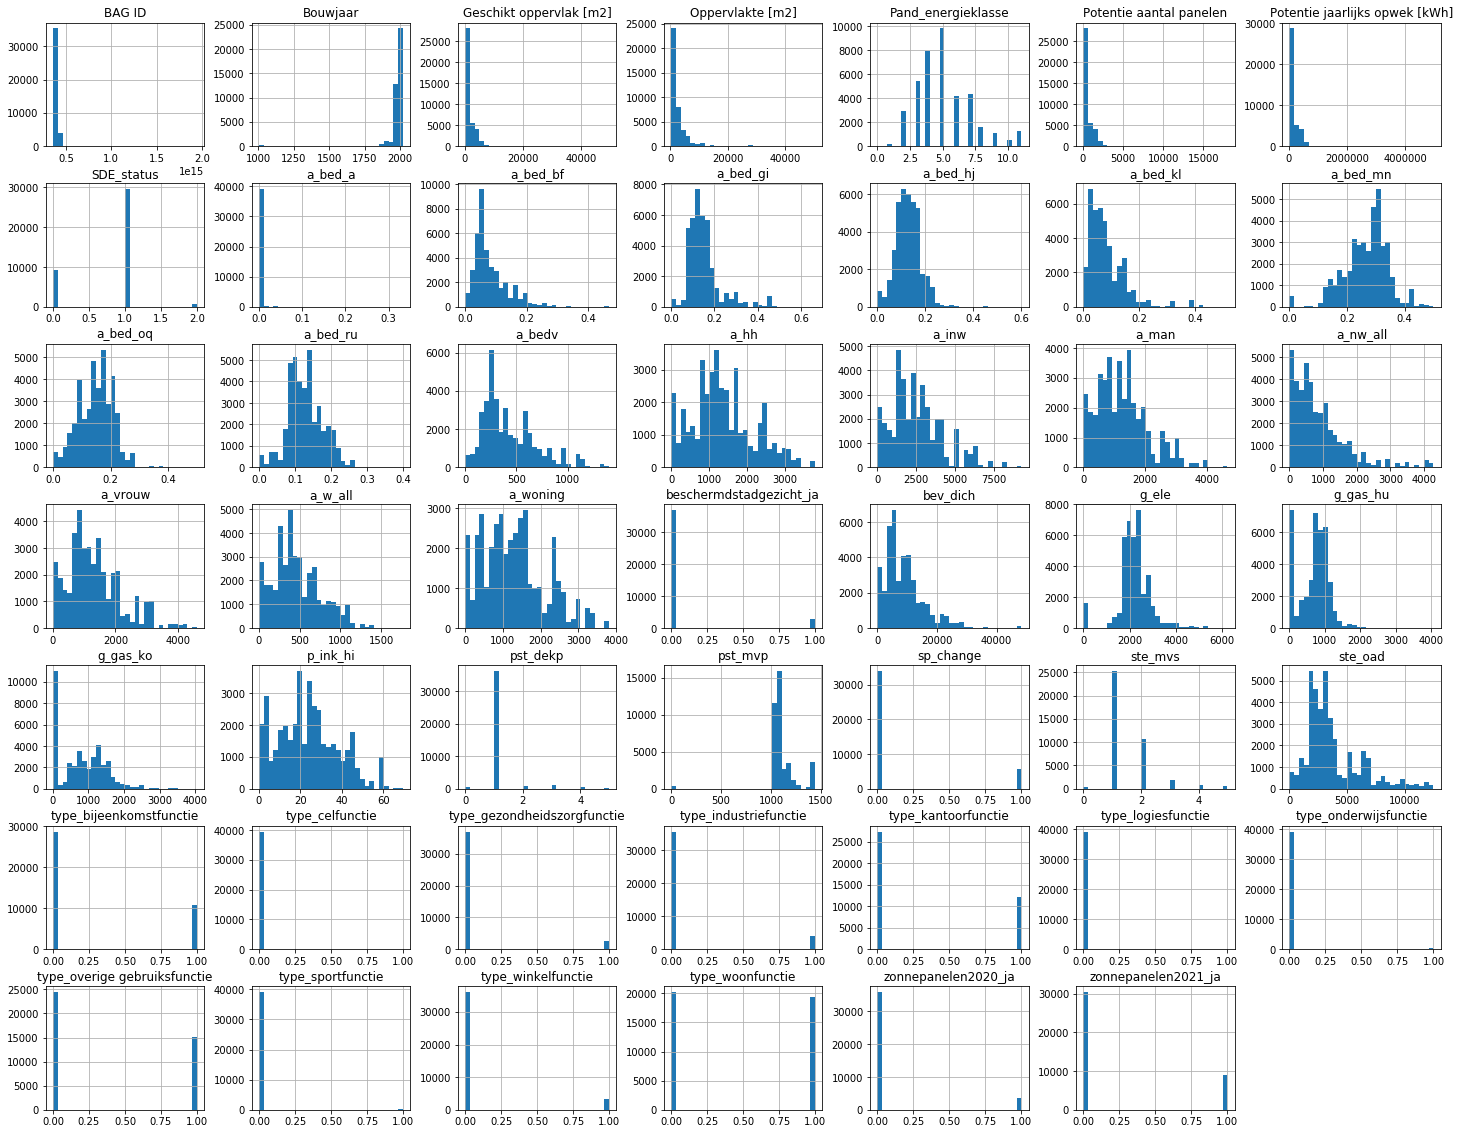

In [127]:
df_num.hist(bins=30, figsize=(25, 20))

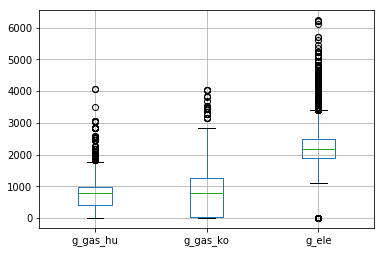

In [128]:
boxplot = df_num.boxplot(column=['g_gas_hu', 'g_gas_ko', 'g_ele'])  
boxplot

In [129]:
# Inter Quartile Range (IQR) filter where median is used as central point 
q_low = df["Bouwjaar"].quantile(0.01)
q_hi  = df["Bouwjaar"].quantile(0.99)
iqr = q_hi - q_low
df_filtered = df[(df["Bouwjaar"] < q_hi) & (df["Bouwjaar"] > q_low)]

In [130]:
df_filtered

BAG ID  Bouwjaar Gemeentenaam2021  Geschikt oppervlak [m2]  Oppervlakte [m2]  Pand_energieklasse  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]  SDE_status                              Wijk   a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru  a_bedv    a_hh   a_inw   a_man  a_nw_all  a_vrouw  a_w_all  a_woning  beschermdstadgezicht_ja  bev_dich   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  pst_dekp  pst_mvp  ste_mvs  ste_oad  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  zonnepanelen2020_ja  zonnepanelen2021_ja  sp_change
0      384100000003420      2002           Diemen                  2573.75           4044.85                   7                    935.0                       248485.26           1                       Diemen Zuid  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000    40.0   375.0   820.0   325.0     385.0    500.0     75.0     482.0                        0   11686.0  2660.0     930.0     690.0       6.4       1.0   1112.0      1.0   3610.0                        1                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                    0                    0          0
1      384100000003420      2002           Diemen                  2573.75           4044.85                   7                    935.0                       248485.26           1                       Diemen Zuid  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000    40.0   375.0   820.0   325.0     385.0    500.0     75.0     482.0                        0   11686.0  2660.0     930.0     690.0       6.4       1.0   1112.0      1.0   3610.0                        1                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                    0                    0          0
2      358100022233829      1972         Aalsmeer                  2783.50           2901.40                  11                   1012.0                       278505.49           1                  Wijk 00 Aalsmeer  0.010101  0.121212  0.353535  0.090909  0.070707  0.171717  0.101010  0.090909   495.0  1130.0  2550.0  1240.0     215.0   1305.0    345.0    1125.0                        0     984.0  3030.0    1380.0    1710.0      17.5       1.0   1431.0      4.0    717.0                        0                0                            0                      1                    1                   0                      0                             0                  0                   0                 0                    0                    0          0
3      457100000057397      2005            Weesp                   941.25           1758.94                   5                    342.0                        91534.20           1                             Noord  0.000000  0.142857  0.119048  0.166667  0.023810  0.261905  0.166667  0.119048   210.0  1105.0  1835.0   925.0     400.0    910.0    350.0    1107.0                        0    7340.0  2020.0     920.0    1020.0      20.1       1.0   1382.0      2.0   2180.0                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 1                    0                    0          0
4      457100000057397      2005            Weesp                   941.25           1758.94                   5                    342.0         

# Relationship features with each other

In [131]:
import seaborn as sns

In [132]:
df_num.describe()

BAG ID      Bouwjaar  Geschikt oppervlak [m2]  Oppervlakte [m2]  Pand_energieklasse  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]    SDE_status       a_bed_a      a_bed_bf      a_bed_gi      a_bed_hj      a_bed_kl      a_bed_mn      a_bed_oq      a_bed_ru        a_bedv          a_hh         a_inw         a_man      a_nw_all       a_vrouw       a_w_all      a_woning  beschermdstadgezicht_ja      bev_dich         g_ele      g_gas_hu      g_gas_ko      p_ink_hi      pst_dekp       pst_mvp       ste_mvs       ste_oad  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  zonnepanelen2020_ja  zonnepanelen2021_ja     sp_change
count  3.947400e+04  39474.000000             39474.000000      39474.000000        39474.000000             39474.000000                    3.947400e+04  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000             39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000  39474.000000             39474.000000     39474.000000                 39474.000000           39474.000000         39474.000000        39474.000000           39474.000000                  39474.000000       39474.000000        39474.000000      39474.000000         39474.000000         39474.000000  39474.000000
mean   3.810427e+14   1987.248619              1681.472343       2382.793461            5.093834               610.974895                    1.614869e+05      0.786568      0.000536      0.081215      0.150112      0.128469      0.081955      0.266078      0.148036      0.128398    432.134823   1373.898389   2569.728936   1267.609566    874.740082   1301.504155    463.912195   1284.756067                 0.068121   8847.906166   2198.497745    695.487663    794.758575     23.708742      1.131606   1107.910954      1.470512   3705.276283                 0.272559         0.000051                     0.063434               0.097431             0.307899            0.004180               0.008563                      0.380985           0.010361            0.086741          0.488701             0.091275             0.229569      0.140422
std    1.015505e+14     74.176388              2139.909466       2986.432998            2.087589               778.168804                    2.043059e+05      0.453576      0.006736      0.055891      0.077121      0.050011      0.065646      0.074569      0.058909      0.048113    260.785624    807.362370   1657.657064    813.604760    797.239323    849.018176    288.023467    820.571833                 0.251956   6511.452145    714.306438    420.764097    636.041659     14.419799      0.562811    157.162443      0.808716   2379.477437                 0.445282         0.007118                     0.243745               0.296548             0.461630            0.064518               0.092138                      0.485635           0.101263            0.281458          0.499879             0.288004             0.420561      0.347428
min    3.581000e+14   1005.000000               153.750000        285.100000            0.000000                55.000000                    1.501253e+04      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000                 0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000                 0.000000         0.000000                     0.000000               0.000000 

AxesSubplot(0.125,0.125;0.62x0.755)


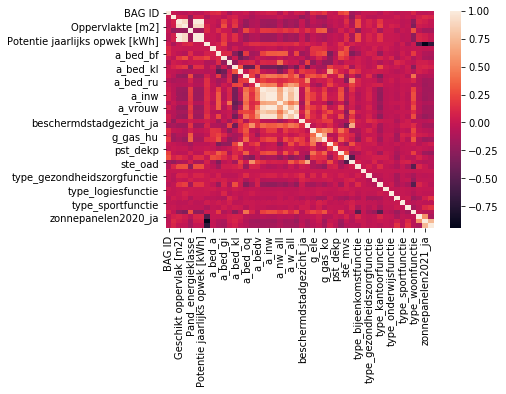

In [133]:
heatmap = sns.heatmap(df_num.corr())
print(heatmap)


In [134]:
df_num.corrwith(df["sp_change"])

BAG ID                           -0.020815
Bouwjaar                          0.093623
Geschikt oppervlak [m2]          -0.009925
Oppervlakte [m2]                 -0.014841
Pand_energieklasse               -0.141852
Potentie aantal panelen          -0.009950
Potentie jaarlijks opwek [kWh]   -0.009529
SDE_status                       -0.700916
a_bed_a                          -0.016651
a_bed_bf                         -0.106317
a_bed_gi                         -0.140318
a_bed_hj                          0.018852
a_bed_kl                          0.065146
a_bed_mn                         -0.027640
a_bed_oq                         -0.071822
a_bed_ru                         -0.140927
a_bedv                           -0.143890
a_hh                             -0.160188
a_inw                            -0.147146
a_man                            -0.146415
a_nw_all                         -0.092753
a_vrouw                          -0.147650
a_w_all                          -0.145306
a_woning   

In [135]:
cor_matrix = df_num.corr()
cor_matrix

BAG ID  Bouwjaar  Geschikt oppervlak [m2]  Oppervlakte [m2]  Pand_energieklasse  Potentie aantal panelen  Potentie jaarlijks opwek [kWh]  SDE_status   a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru    a_bedv      a_hh     a_inw     a_man  a_nw_all   a_vrouw   a_w_all  a_woning  beschermdstadgezicht_ja  bev_dich     g_ele  g_gas_hu  g_gas_ko  p_ink_hi  pst_dekp   pst_mvp   ste_mvs   ste_oad  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  zonnepanelen2020_ja  zonnepanelen2021_ja  sp_change
BAG ID                          1.000000  0.015971                -0.042841         -0.050019           -0.001671                -0.042849                       -0.043035    0.030678  0.114022  0.140714  0.022663 -0.132781  0.001836 -0.008872  0.027271 -0.066559  0.002513  0.028581  0.068617  0.063067 -0.080855  0.073592 -0.054523  0.051139                 0.031552 -0.133812  0.145257  0.105598  0.181287  0.005190 -0.014941  0.224479  0.296516 -0.161120                -0.077004         0.000565                    -0.002383               0.000186            -0.059965            0.025181              -0.004721                     -0.043000          -0.015458           -0.010998          0.091317            -0.030542            -0.037318  -0.020815
Bouwjaar                        0.015971  1.000000                 0.070783          0.054766           -0.225085                 0.070785                        0.069671   -0.113511  0.006669  0.007751 -0.043987  0.048060  0.081396 -0.020266 -0.047115 -0.132013 -0.057572 -0.051586 -0.044253 -0.042355  0.005907 -0.046320 -0.067349 -0.072426                -0.235710 -0.126076 -0.017803 -0.165020 -0.178900 -0.007654  0.015908 -0.006775  0.079670 -0.225810                 0.100830         0.002135                    -0.055209              -0.068628            -0.020724           -0.018512              -0.015468                      0.041722          -0.022596            0.008698         -0.030943             0.059175             0.117997   0.093623
Geschikt oppervlak [m2]        -0.042841  0.070783                 1.000000          0.915084           -0.184536                 1.000000                        0.999342    0.007681  0.017161 -0.040095  0.184599  0.011909  0.150897 -0.055336 -0.205842 -0.097193 -0.076197 -0.173743 -0.187937 -0.179355 -0.082010 -0.195277 -0.141587 -0.183126                 0.003586 -0.178904 -0.026692 -0.089921 -0.131285 -0.046161 -0.005308 -0.046014  0.143196 -0.129987                 0.285142        -0.001953                     0.093838               0.014951             0.177732            0.004720               0.015427                     -0.000201          -0.042879           -0.029564         -0.254521             0.090066             0.054694  -0.009925
Oppervlakte [m2]               -0.050019  0.054766                 0.915084          1.000000           -0.211338                 0.915078                        0.908530    0.090126  0.001017 -0.078198  0.284303 -0.027050  0.192718 -0.095488 -0.231459 -0.098737 -0.065608 -0.192359 -0.205696 -0.195461 -0.062759 -0.214520 -0.145667 -0.202761                -0.004252 -0.183352 -0.080419 -0.111224 -0.196501 -0.075297 -0.000385 -0.046911  0.076256 -0.097213                 0.291766         0.006266                     0.080763              -0.006640             0.219389            0.010980               0.074879                      0.039640          -0.044438           -0.014564         -0.317303             0.039954             0.016122  -0.014841
Pand_energieklasse             -0.001671 -0.225085                -0.184536         -0.211338            1.000000                -0.184533                       -0.178775    0.122713 -0.000564  0.126846  0.021515  0.005476 -0.226197 -0.081248  0.255764  

In [136]:
#list highest correlated features
corr_values = abs(cor_matrix.unstack().sort_values(ascending=False))
corr_values = corr_values[corr_values != 1.0]
#highest_corr_features = pd.DataFrame(corr_values[corr_values == corr_values.max()]).reset_index()
highest_corr_features = pd.DataFrame(corr_values[:15]).reset_index()
highest_corr_features.columns = ['feature_1','feature_2','correlation']
print(highest_corr_features)


                         feature_1                       feature_2  correlation
0          Potentie aantal panelen         Geschikt oppervlak [m2]     1.000000
1          Geschikt oppervlak [m2]         Potentie aantal panelen     1.000000
2          Potentie aantal panelen  Potentie jaarlijks opwek [kWh]     0.999342
3   Potentie jaarlijks opwek [kWh]         Potentie aantal panelen     0.999342
4   Potentie jaarlijks opwek [kWh]         Geschikt oppervlak [m2]     0.999342
5          Geschikt oppervlak [m2]  Potentie jaarlijks opwek [kWh]     0.999342
6                          a_vrouw                           a_inw     0.997391
7                            a_inw                         a_vrouw     0.997391
8                            a_inw                           a_man     0.997151
9                            a_man                           a_inw     0.997151
10                           a_man                         a_vrouw     0.989112
11                         a_vrouw      

In [137]:
df.drop(['Potentie aantal panelen'],axis=1,inplace=True)
df.drop(['Geschikt oppervlak [m2]'],axis=1,inplace=True)
df.drop(['a_vrouw'],axis=1,inplace=True)
df.drop(['a_hh'],axis=1,inplace=True)
df.drop(['a_woning'],axis=1,inplace=True)
df.drop(['a_w_all'],axis=1,inplace=True)


In [138]:
df.drop(['pst_dekp'],axis=1,inplace=True)
df.drop(['pst_mvp'],axis=1,inplace=True)

In [139]:
df.dtypes

BAG ID                              int64
Bouwjaar                            int64
Gemeentenaam2021                   object
Oppervlakte [m2]                  float64
Pand_energieklasse                  int64
Potentie jaarlijks opwek [kWh]    float64
SDE_status                           int8
Wijk                               object
a_bed_a                           float64
a_bed_bf                          float64
a_bed_gi                          float64
a_bed_hj                          float64
a_bed_kl                          float64
a_bed_mn                          float64
a_bed_oq                          float64
a_bed_ru                          float64
a_bedv                            float64
a_inw                             float64
a_man                             float64
a_nw_all                          float64
beschermdstadgezicht_ja             uint8
bev_dich                          float64
g_ele                             float64
g_gas_hu                          

# Relationship with target variable 

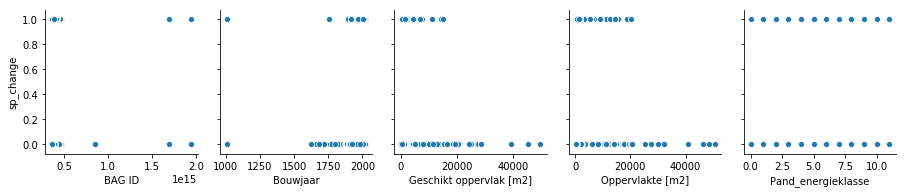

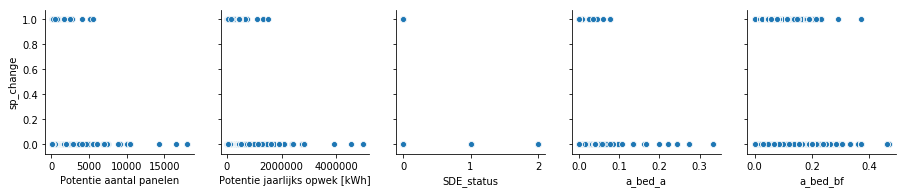

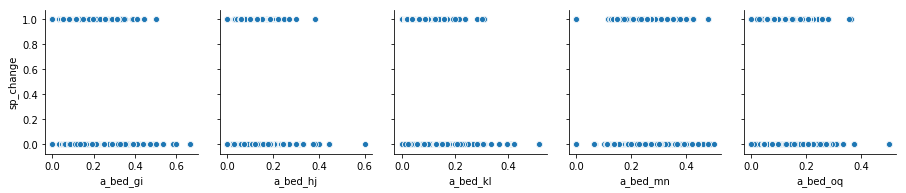

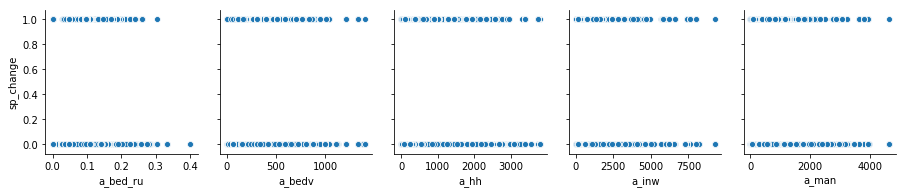

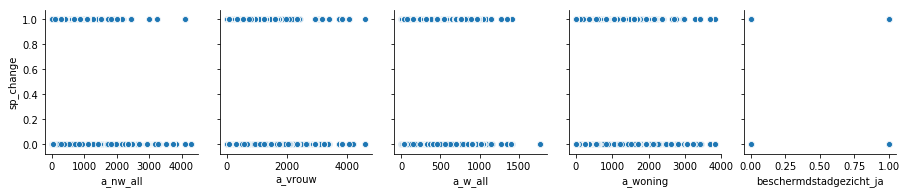

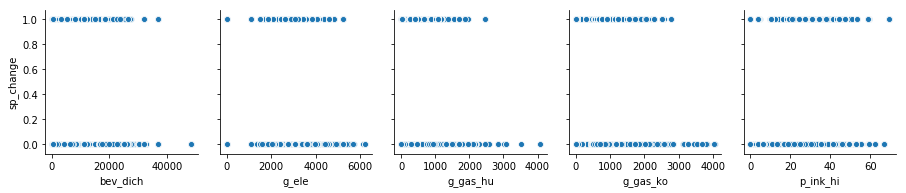

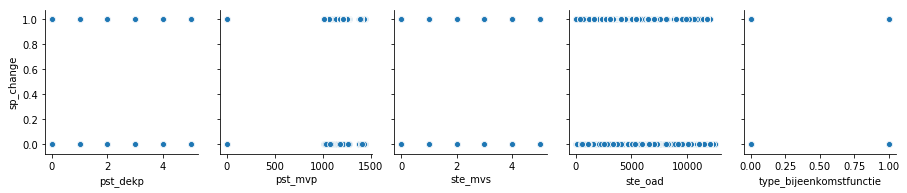

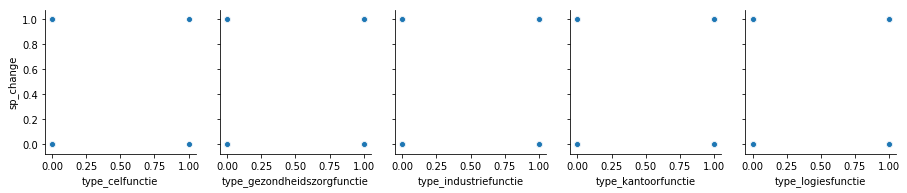

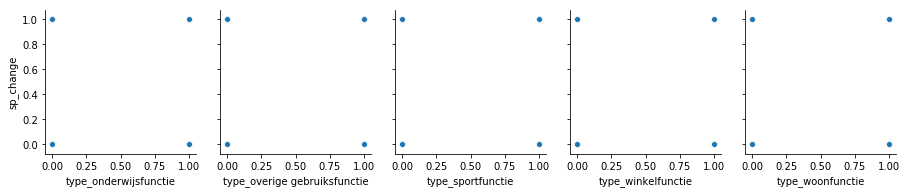

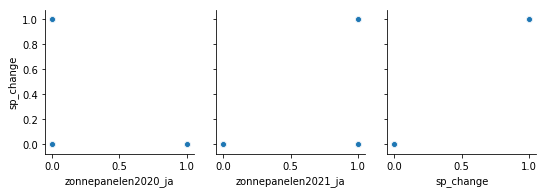

In [140]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['sp_change'])

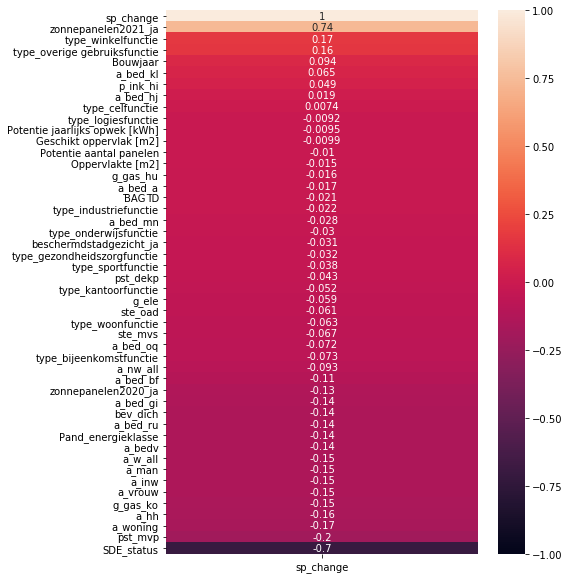

In [141]:
plt.figure(figsize=(7, 10))
heatmap = sns.heatmap(df_num.corr()[['sp_change']].sort_values(by='sp_change', ascending=False), vmin=-1, vmax=1, annot=True)

In [142]:
df

BAG ID  Bouwjaar Gemeentenaam2021  Oppervlakte [m2]  Pand_energieklasse  Potentie jaarlijks opwek [kWh]  SDE_status                              Wijk   a_bed_a  a_bed_bf  a_bed_gi  a_bed_hj  a_bed_kl  a_bed_mn  a_bed_oq  a_bed_ru  a_bedv   a_inw   a_man  a_nw_all  beschermdstadgezicht_ja  bev_dich   g_ele  g_gas_hu  g_gas_ko  p_ink_hi  ste_mvs  ste_oad  type_bijeenkomstfunctie  type_celfunctie  type_gezondheidszorgfunctie  type_industriefunctie  type_kantoorfunctie  type_logiesfunctie  type_onderwijsfunctie  type_overige gebruiksfunctie  type_sportfunctie  type_winkelfunctie  type_woonfunctie  zonnepanelen2020_ja  zonnepanelen2021_ja  sp_change
0      384100000003420      2002           Diemen           4044.85                   7                       248485.26           1                       Diemen Zuid  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000    40.0   820.0   325.0     385.0                        0   11686.0  2660.0     930.0     690.0       6.4      1.0   3610.0                        1                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                    0                    0          0
1      384100000003420      2002           Diemen           4044.85                   7                       248485.26           1                       Diemen Zuid  0.000000  0.125000  0.125000  0.125000  0.000000  0.125000  0.375000  0.125000    40.0   820.0   325.0     385.0                        0   11686.0  2660.0     930.0     690.0       6.4      1.0   3610.0                        1                0                            1                      0                    0                   0                      0                             0                  0                   0                 0                    0                    0          0
2      358100022233829      1972         Aalsmeer           2901.40                  11                       278505.49           1                  Wijk 00 Aalsmeer  0.010101  0.121212  0.353535  0.090909  0.070707  0.171717  0.101010  0.090909   495.0  2550.0  1240.0     215.0                        0     984.0  3030.0    1380.0    1710.0      17.5      4.0    717.0                        0                0                            0                      1                    1                   0                      0                             0                  0                   0                 0                    0                    0          0
3      457100000057397      2005            Weesp           1758.94                   5                        91534.20           1                             Noord  0.000000  0.142857  0.119048  0.166667  0.023810  0.261905  0.166667  0.119048   210.0  1835.0   925.0     400.0                        0    7340.0  2020.0     920.0    1020.0      20.1      2.0   2180.0                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 1                    0                    0          0
4      457100000057397      2005            Weesp           1758.94                   5                        91534.20           1                             Noord  0.000000  0.142857  0.119048  0.166667  0.023810  0.261905  0.166667  0.119048   210.0  1835.0   925.0     400.0                        0    7340.0  2020.0     920.0    1020.0      20.1      2.0   2180.0                        0                0                            0                      0                    0                   0                      0                             1                  0                   0                 1                    0                    0          0
5 